In [1]:
#K Nearest Neighbors and decision tree with Python
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#Load the Data Classified Data
df =pd.read_csv('Classified Data.txt')  # for tab-separated text files
df=df.drop(columns='Unnamed: 0')


Because the **KNN** classifier predicts the class of a given test observation
by identifying the observations that are nearest to it, the scale of the
variables matters. Any variables that are on a large scale will have a much
larger effect on the distance between the observations, and hence on the KNN
classifier, than variables that are on a small scale.

In [12]:
from sklearn.preprocessing import StandardScaler
#Standardize the input Variables, don't include TARGET CLASS in input dataframe
# Exclude the target class from the input dataframe
X = df.drop(columns=['TARGET CLASS'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the input variables (excluding the target class)
X_scaled = scaler.fit_transform(X)

# Convert the scaled input variables back to a dataframe
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Verify the scaled input variables
print(X_scaled_df.head())


        WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   

        PJF       HQE       NXJ  
0 -1.482368 -0.949719 -0.643314  
1 -0.202240 -1.828051  0.636759  
2  0.285707 -0.682494 -0.377850  
3  1.066491  1.241325 -1.026987  
4 -1.472352  1.040772  0.276510  


In [13]:
#Train-Test Split
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['TARGET CLASS'])  # Features
y = df['TARGET CLASS']  # Target variable

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
## Using KNN
#Remember that we are trying to come up with a model to predict whether someone
#will TARGET CLASS or not. We'll start with k=1.
# Instantiate the KNN model with k=1
knn = KNeighborsClassifier(n_neighbors=1)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
#Predicting and evavluations
#Let's evaluate our knn model.


#[[125  18]
# [ 13 144]]
# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[90  8]
 [ 6 96]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        98
           1       0.92      0.94      0.93       102

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



print(classification_report(y_test,pred))

        precision    recall  f1-score   support

         0       0.91      0.87      0.89       143
         1       0.89      0.92      0.90       157
         Total   0.90      0.90      0.90       300

Text(0, 0.5, 'Error Rate')

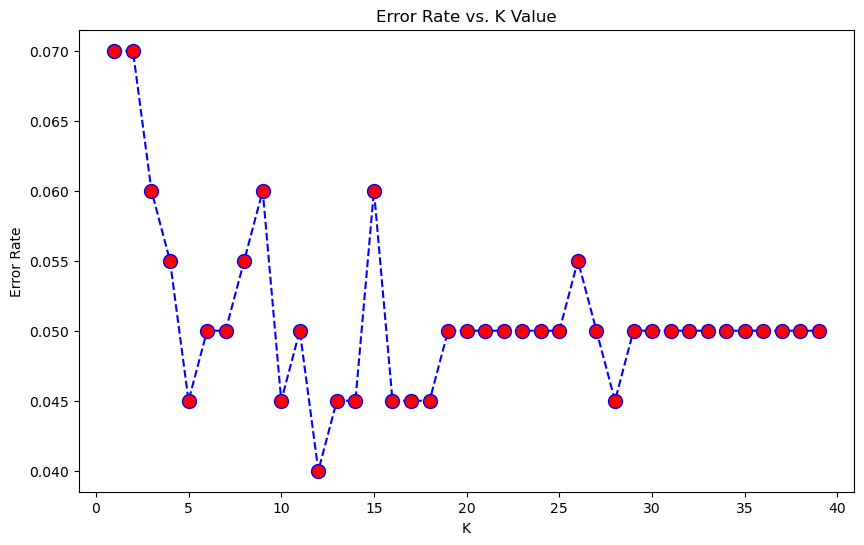

In [17]:
#Let's go ahead and use the elbow method to pick a good K Value:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
# Will take some time


plt.figure(figsize=(10,6))

plt.plot(range(1,40),error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')

plt.xlabel('K')

plt.ylabel('Error Rate')


In [21]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH K=1


[[90  8]
 [ 6 96]]


              precision    recall  f1-score   support

           0       0.94      0.92      0.93        98
           1       0.92      0.94      0.93       102

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



In [30]:
# NOW WITH K=23
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))
#WITH K=23

WITH K=23


[[93  5]
 [ 5 97]]


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        98
           1       0.95      0.95      0.95       102

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

